**Dataset:**  National Health and Nutrition Examination Survey

**Label:** Glycohemoglobin - also known as glycosylated hemoglobin, hemoglobin to which glucose is bound, *a measure of the long-term control of diabetes mellitus*. The level of glycohemoglobin is increased in the red blood cells of persons with poorly controlled diabetes mellitus.

According to Glycohemoglobin, 
0-> Normal status 
1-> High-risk diabetes 
2-> Diabetes patients

# Libraries

In [1]:
# load data
import os
import pandas as pd

# numpy
import numpy as np

#sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# seaborn
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# Load Data

In [2]:
DIABETES_PATH = os.path.join("datasets", "diabetes")

def load_data(filename, diabetes_path=DIABETES_PATH):
    csv_path = os.path.join(diabetes_path, filename)
    return pd.read_csv(csv_path)


In [3]:
df1 = load_data("labs.csv")
df2 = load_data("examination.csv")
df3 = load_data("demographic.csv")
df4 = load_data("diet.csv")
df5 = load_data("questionnaire.csv")


# Exploratory Data Analysis

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 424 entries, SEQN to LBDB12SI
dtypes: float64(423), int64(1)
memory usage: 31.7 MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 224 entries, SEQN to CSAEFFRT
dtypes: float64(192), int64(3), object(29)
memory usage: 16.8+ MB


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   SDDSRVYR  10175 non-null  int64  
 2   RIDSTATR  10175 non-null  int64  
 3   RIAGENDR  10175 non-null  int64  
 4   RIDAGEYR  10175 non-null  int64  
 5   RIDAGEMN  673 non-null    float64
 6   RIDRETH1  10175 non-null  int64  
 7   RIDRETH3  10175 non-null  int64  
 8   RIDEXMON  9813 non-null   float64
 9   RIDEXAGM  4213 non-null   float64
 10  DMQMILIZ  6261 non-null   float64
 11  DMQADFC   543 non-null    float64
 12  DMDBORN4  10175 non-null  int64  
 13  DMDCITZN  10171 non-null  float64
 14  DMDYRSUS  1908 non-null   float64
 15  DMDEDUC3  2803 non-null   float64
 16  DMDEDUC2  5769 non-null   float64
 17  DMDMARTL  5769 non-null   float64
 18  RIDEXPRG  1309 non-null   float64
 19  SIALANG   10175 non-null  int64  
 20  SIAPROXY  10174 non-null  fl

In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 168 entries, SEQN to DRD370V
dtypes: float64(166), int64(2)
memory usage: 12.6 MB


In [8]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Columns: 953 entries, SEQN to WHQ520
dtypes: float64(944), int64(7), object(2)
memory usage: 74.0+ MB


# Data Preparation

**Drop "SEQN" Column:**

In [9]:
df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

**Concatenate Datasets**

In [10]:
df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 1812 entries, SEQN to WHQ520
dtypes: float64(1753), int64(28), object(31)
memory usage: 135.7+ MB


In [12]:
df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [13]:
df[["WHD080U"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WHD080U  14 non-null     float64
dtypes: float64(1)
memory usage: 76.8 KB


In [14]:
df[["WHD080L"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WHD080L  28 non-null     float64
dtypes: float64(1)
memory usage: 76.8 KB


# Feature Engineering

**Rename Columns**

In [15]:
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', # Nan -> american i guess
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

**Select Columns**

In [16]:
df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 9813 non-null   int64  
 1   Gender             9813 non-null   int64  
 2   Years_in_US        1837 non-null   float64
 3   Family_income      9051 non-null   float64
 4   GlycoHemoglobin    6643 non-null   float64
 5   ArmCircum          9301 non-null   float64
 6   SaggitalAbdominal  7218 non-null   float64
 7   GripStrength       7677 non-null   float64
 8   Breast_fed         8661 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 690.1 KB


In [17]:
df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,1837.000000,9051.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,1.509426,8.933043,2.253101,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,0.499937,17.787060,1.635458,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


**Handling Missing Values**

In [18]:
# drop columns and rows if all cells is NaN
df.dropna(axis=1, how='all') # dropna from columns
df.dropna(axis=0, how='all') # dropna from rows

# replace Nan with median
df["GlycoHemoglobin"].fillna(df["GlycoHemoglobin"].median(), inplace=True)
df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median(), inplace=True)
df['ArmCircum'].fillna(df['ArmCircum'].median(), inplace=True)
df['GripStrength'].fillna(df['GripStrength'].median(), inplace=True)

# replace Nan with ffill
df['Family_income'].fillna(method='ffill', inplace=True)

# replace Nan with 1
df['Breast_fed'].fillna(value = 1, inplace=True)

# replace Nan with 0
df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

**Define Label with 3 categories**

In [19]:
#0-> Normal status 
#1-> High-risk diabetes 
#2-> Diabetes patients

df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

# drop GlycoHemoglobin and ID to avoid bias
df.drop(['GlycoHemoglobin', 'ID'], axis = 1, inplace=True)

# Site of changes

([<matplotlib.patches.Wedge at 0x23ba5870910>,
 [Text(-1.021002339427538, 0.40933387702888036, '87.86%, No-diabetes'),
  Text(0.9265540885098532, -0.59287226370077, '6.16%, High-risk diabetes'),
  Text(1.0806332747227252, -0.20550359014391814, '5.98%, Diabetic patients')])

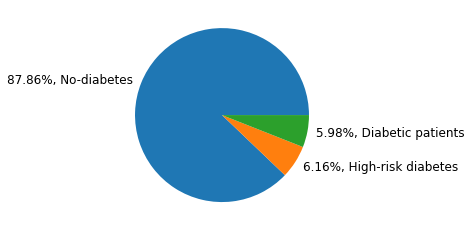

In [20]:
#df["Diabetes"] = df["Diabetes"].astype('int').astype('category')
y = df[["Diabetes"]].value_counts()
l = ["87.86%, No-diabetes", "6.16%, High-risk diabetes", "5.98%, Diabetic patients"]
#y =np.array([8622, ])
plt.pie(y, labels = l)



In [21]:
df.describe()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,1.509426,1.672271,2.246973,28.528248,21.004545,62.455233,1.868949,0.182921
std,0.499937,8.446506,1.635495,7.753571,4.261142,22.228196,0.337473,0.522102
min,1.000000,0.000000,0.000000,10.400000,10.100000,8.000000,1.000000,0.000000
25%,1.000000,0.000000,0.870000,23.200000,18.500000,50.300000,2.000000,0.000000
50%,2.000000,0.000000,1.700000,29.300000,20.700000,60.300000,2.000000,0.000000
75%,2.000000,0.000000,3.600000,33.800000,22.900000,73.300000,2.000000,0.000000
max,2.000000,99.000000,5.000000,59.400000,40.100000,162.800000,2.000000,2.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             9813 non-null   int64  
 1   Years_in_US        9813 non-null   float64
 2   Family_income      9813 non-null   float64
 3   ArmCircum          9813 non-null   float64
 4   SaggitalAbdominal  9813 non-null   float64
 5   GripStrength       9813 non-null   float64
 6   Breast_fed         9813 non-null   float64
 7   Diabetes           9813 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 613.4 KB


# OUTLIER Dectection

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Gender'),
  Text(2, 0, 'Years_in_US'),
  Text(3, 0, 'Family_income'),
  Text(4, 0, 'ArmCircum'),
  Text(5, 0, 'SaggitalAbdominal'),
  Text(6, 0, 'GripStrength'),
  Text(7, 0, 'Breast_fed'),
  Text(8, 0, 'Diabetes')])

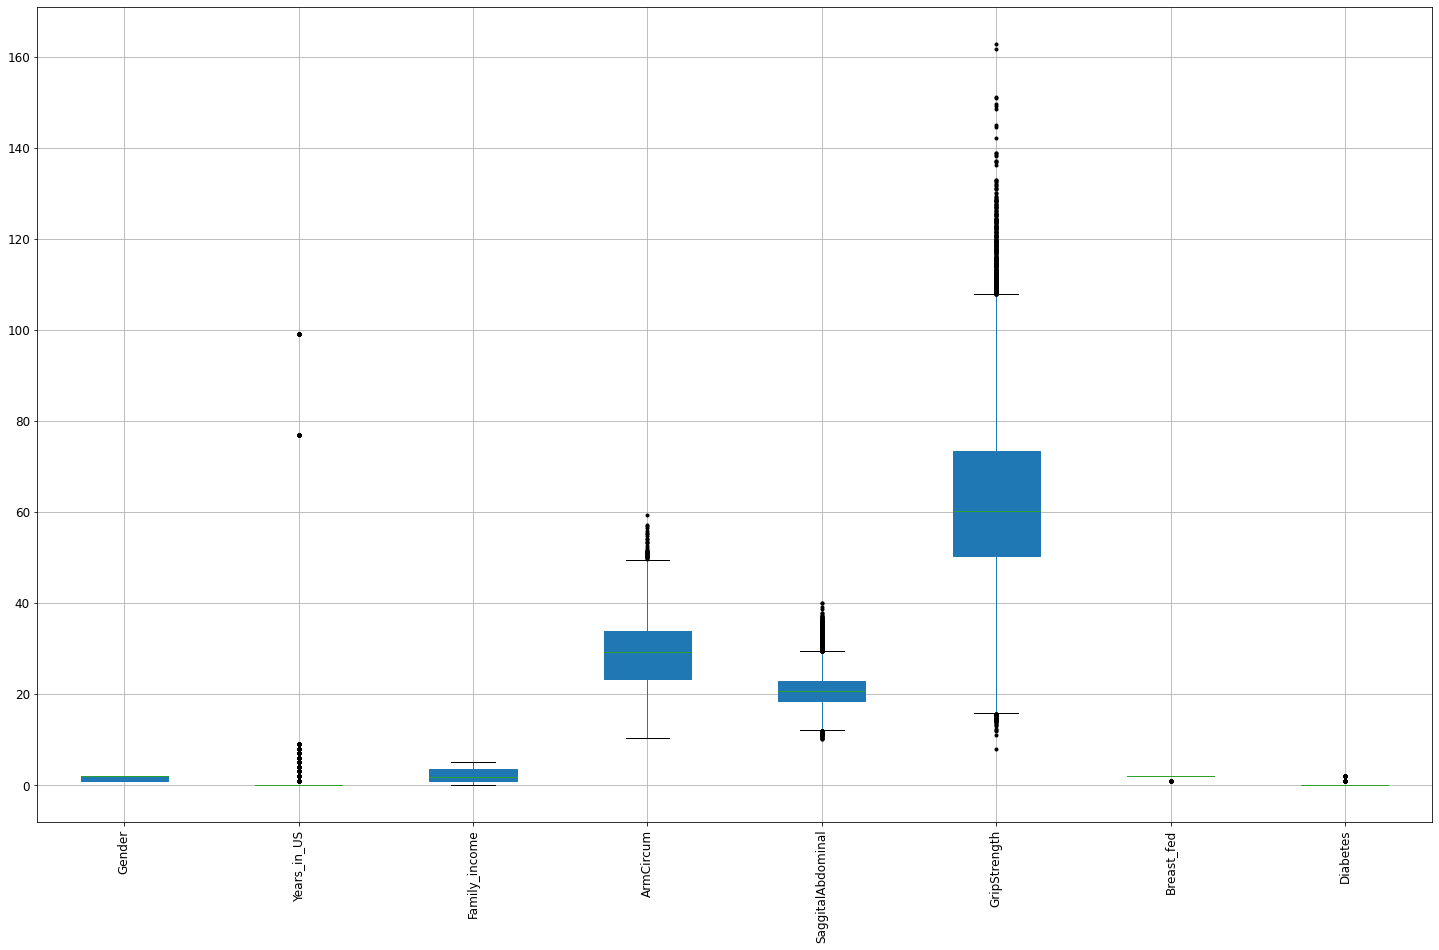

In [23]:
plt.subplots(figsize=(25,15))
df.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

# Remove outlier

In [24]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [25]:
def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

# taking all the columns except the last one
# last column is the label

X = df.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [26]:
X = df.iloc[:, :-1]

**Print Features that Contains Outlier**

In [27]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

Years_in_US Contains Outlier
ArmCircum Contains Outlier
SaggitalAbdominal Contains Outlier
GripStrength Contains Outlier
Breast_fed Contains Outlier


**Remove Outliers**

In [28]:
for i in range (50):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Gender'),
  Text(2, 0, 'Years_in_US'),
  Text(3, 0, 'Family_income'),
  Text(4, 0, 'ArmCircum'),
  Text(5, 0, 'SaggitalAbdominal'),
  Text(6, 0, 'GripStrength'),
  Text(7, 0, 'Breast_fed')])

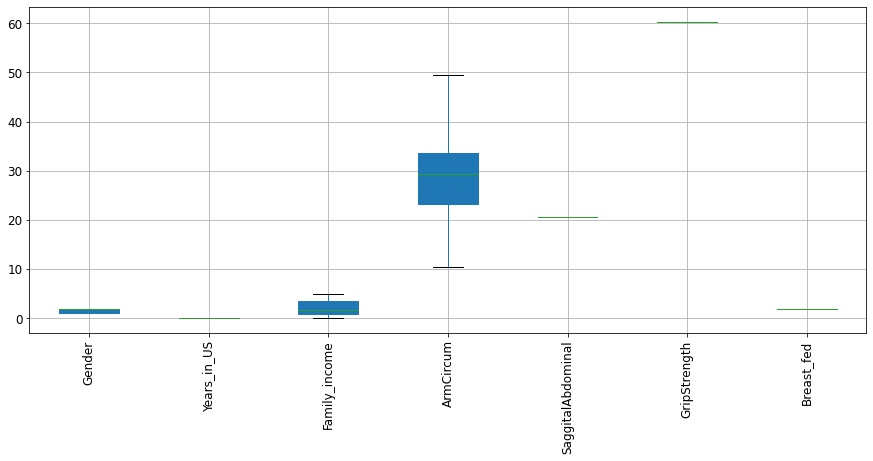

In [29]:
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

**Standardize the Predictors**

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,-1.019034,0.0,-0.860318,0.905019,0.0,1.0,0.0
1,-1.019034,0.0,-0.285539,0.825996,0.0,1.0,0.0
2,-1.019034,0.0,1.383766,0.667950,0.0,1.0,0.0
3,-1.019034,0.0,0.166947,-0.978367,0.0,1.0,0.0
4,0.981322,0.0,1.683385,-0.425204,0.0,1.0,0.0


In [32]:
label = df["Diabetes"]

In [33]:
encoder = LabelEncoder()
label = encoder.fit_transform(label)

# Slip Dataset

In [34]:
X = scaled_df
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [35]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7850, 7) (1963, 7)
(7850,) (1963,)


# Risk Factor Analysis: Risk Factors and their F-Scores

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

xnew2=SelectKBest(f_classif, k=5).fit_transform(X, y)
xnew2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [1 4 5 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[-1.01903365, -0.86031764,  0.9050193 ,  1.        ,  0.        ],
       [-1.01903365, -0.28553877,  0.82599612,  1.        ,  0.        ],
       [-1.01903365,  1.38376582,  0.66794975,  1.        ,  0.        ],
       ...,
       [-1.01903365,  1.6833846 ,  1.12891831,  1.        ,  0.        ],
       [ 0.98132186, -0.43840549, -1.24177713,  1.        ,  0.        ],
       [ 0.98132186,  0.74172559, -0.45154531,  1.        ,  0.        ]])

In [37]:
import sklearn.feature_selection as fs
import matplotlib.pyplot as plt
df2 = fs.SelectKBest(k='all')
df2.fit(X, y)

names = X.columns.values[df2.get_support()]
scores = df2.scores_[df2.get_support()]

names_scores = list(zip(names, scores))

ns_df = pd.DataFrame(data = names_scores, columns=['Features','F_Scores'])

ns_df_sorted = ns_df.sort_values(['F_Scores','Features'], ascending =[False, True])

print(ns_df_sorted)

            Features    F_Scores
3          ArmCircum  435.144494
2      Family_income    2.779280
0             Gender    1.781081
6         Breast_fed         NaN
5       GripStrength         NaN
4  SaggitalAbdominal         NaN
1        Years_in_US         NaN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [1 4 5 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Risk Factor Analysis: Identify Risk Factors and their P-Value

In [38]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

logit_model = sm.OLS(y_train, X_train)
result = logit_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.073     
Dependent Variable: y                AIC:                11544.9310
Date:               2022-05-01 23:34 BIC:                11572.8041
No. Observations:   7850             Log-Likelihood:     -5768.5   
Df Model:           3                F-statistic:        208.1     
Df Residuals:       7846             Prob (F-statistic): 7.14e-130 
R-squared:          0.074            Scale:              0.25469   
-------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-------------------------------------------------------------------
Gender               -0.0049   0.0057 -0.8648 0.3872 -0.0161 0.0062
Years_in_US           0.0000   0.0000  7.5567 0.0000  0.0000 0.0000
Family_income        -0.0035   0.0057 -0.6081 0.5432 -0.0146 0.0077
ArmCircum             0.1427   0.0057 24.9727 0.0000  0.1315 0.153

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [39]:
np.exp(result.params)

Gender               0.995084
Years_in_US          1.000000
Family_income        0.996555
ArmCircum            1.153343
SaggitalAbdominal    1.000000
GripStrength         1.203710
Breast_fed           1.000000
dtype: float64

In [40]:
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                         5%       95%  Odds Ratio
Gender             0.984031  1.006262    0.995084
Years_in_US        1.000000  1.000000    1.000000
Family_income      0.985529  1.007704    0.996555
ArmCircum          1.140499  1.166332    1.153343
SaggitalAbdominal  1.000000  1.000000    1.000000
GripStrength       1.190344  1.217226    1.203710
Breast_fed         1.000000  1.000000    1.000000


In [41]:
result.pvalues.sort_values()

GripStrength         4.162826e-218
ArmCircum            1.630400e-132
Years_in_US           4.600007e-14
Gender                3.871657e-01
Family_income         5.431664e-01
SaggitalAbdominal              NaN
Breast_fed                     NaN
dtype: float64

# Class Imbalance: Assign Class Weights

Best parameters : {'class_weight': {0: 0.95, 1: 0.05, 2: 0.95}}


<AxesSubplot:xlabel='weight'>

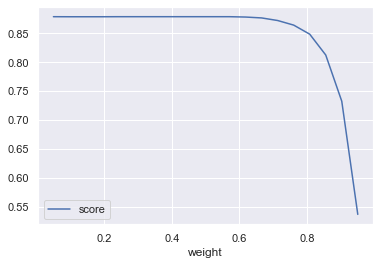

In [42]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'class_weight': [{0: 1.0-x, 1: x, 2: 1.0-x} for x in weights]},
    scoring='accuracy',
    cv=10)

grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                    'weight': weights })
dataz.plot(x='weight')

In [43]:
class_weight = {0: 0.95,
               1: 0.05,
               2: 0.95}

In [44]:
df[["Diabetes"]].value_counts()

Diabetes
0.0         8622
2.0          604
1.0          587
dtype: int64

# Train Model

## Logistic Regression

              precision    recall  f1-score   support

           0       0.96      0.65      0.78      1741
           1       0.08      0.23      0.12       104
           2       0.11      0.47      0.18       118

    accuracy                           0.62      1963
   macro avg       0.39      0.45      0.36      1963
weighted avg       0.87      0.62      0.71      1963



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

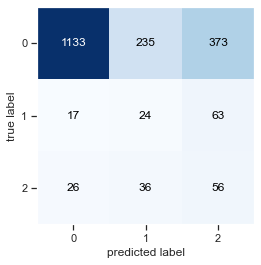

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt
lr = LogisticRegression(class_weight='balanced', random_state=420)

# Fit..
lr.fit(X_train, y_train)

# Predict..
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc

# Support Vector Classifier

              precision    recall  f1-score   support

           0       0.98      0.44      0.61      1741
           1       0.07      0.46      0.13       104
           2       0.10      0.43      0.16       118

    accuracy                           0.44      1963
   macro avg       0.38      0.44      0.30      1963
weighted avg       0.88      0.44      0.56      1963



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

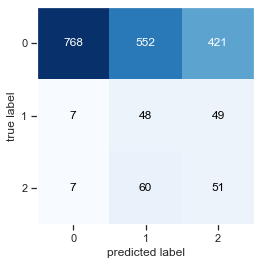

In [46]:
from sklearn.svm import SVC

clf_svc_rbf = SVC(kernel="rbf",class_weight='balanced',random_state=4200)
clf_svc_rbf.fit(X_train,y_train)
y_pred_clf_svc_rbf = clf_svc_rbf.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_clf_svc_rbf)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True)
#plt.show()

#print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, y_pred_clf_svc_rbf))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_clf_svc_rbf))

#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf_svc_rbf)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1741
           1       0.09      0.06      0.07       104
           2       0.01      0.01      0.01       118

    accuracy                           0.83      1963
   macro avg       0.33      0.33      0.33      1963
weighted avg       0.80      0.83      0.81      1963



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

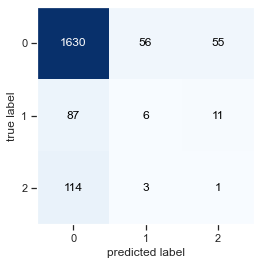

In [47]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(class_weight='balanced',random_state=4200)
rd.fit(X_train,y_train)
y_pred_rd = rd.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_rd)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True,linewidths=.3)
#plt.show()

print(classification_report(y_test,y_pred_rd))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rd))

#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rd)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc

# Using CV=5 Approach

**Logistic Regression**

In [48]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# create model
model = LogisticRegression(class_weight=class_weight)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.8806 (0.0035)


array([0.87926643, 0.88741722, 0.87977585, 0.87722873, 0.87926643])

**SVM**

In [49]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# create model
model = SVC(kernel='rbf', C=1, class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.8805 (0.0036)


array([0.878757  , 0.88741722, 0.87977585, 0.87722873, 0.87926643])

**Random Forest Classifier**

In [50]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# create model
model = RandomForestClassifier(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.8511 (0.0037)


array([0.85175751, 0.85532348, 0.85175751, 0.84411615, 0.85277636])

**Decision Tree**

In [51]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# create model
model = DecisionTreeClassifier(class_weight=class_weight)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.7961 (0.0071)


array([0.79572084, 0.79215487, 0.79826796, 0.7865512 , 0.80794702])

# Ensemble Learning: LR+SVC+RF+DT

In [52]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = SVC(kernel='rbf', C=1, class_weight=class_weight,random_state=42)
clf2 = LogisticRegression(class_weight=class_weight,random_state=42)
clf3 = RandomForestClassifier(class_weight=class_weight,random_state=42)
clf4 = DecisionTreeClassifier(class_weight=class_weight,random_state=42)
#clf5 = Sequential()

In [53]:
eclf = VotingClassifier( estimators=[('svm', clf1), ('lr', clf2), ('rf', clf3), ('dt',clf4)],
     voting='hard')

In [54]:
for clf, label in zip([clf1, clf2, clf3,clf4 ,eclf], ['SVM', 'LR', 'RF','DT', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))
scores

Accuracy: 0.8785 (+/- 0.0004) [Ensemble]


array([0.878757  , 0.87824758, 0.87824758, 0.87818552, 0.87920489])